In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as DF

%matplotlib inline

In [2]:
np.log([2.0,4.0])

array([0.69314718, 1.38629436])

In [3]:
pi = np.pi
log = np.log
exp = np.exp
sqrt = np.sqrt
sin = np.sin
arcsin = np.arcsin
sinh = np.sinh
cos = np.cos
tan = np.tan
arctan = np.arctan
tanh = np.tanh
arctanh = np.arctanh

In [4]:
def Midpoint_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    d = len(y_0)
    
    t = np.linspace(a, b, n+1)
    w = np.zeros((d, n+1))
    w[:, 0] = y_0
    
    for i in range(n):
        w[:, i+1] = w[:, i] + h*f(t[i] + h/2, w[:, i] + f(t[i], w[:, i])*h/2)
        
    return t, w

In [5]:
def RK4(f, a, b, h, y_0):
    n = int((b - a)/h)
    d = len(y_0)
    
    t = np.linspace(a, b, n+1)
    w = np.zeros((d, n+1))
    w[:, 0] = y_0
    
    for i in range(n):
        s_1 = f(t[i], w[:, i])
        s_2 = f(t[i] + h/2, w[:, i] + s_1*h/2)
        s_3 = f(t[i] + h/2, w[:, i] + s_2*h/2)
        s_4 = f(t[i] + h, w[:, i] + s_3*h)        
        
        w[:, i+1] = w[:, i] + (s_1 + 2*s_2 + 2*s_3 + s_4)*h/6
        
    return t, w

# 例1

In [7]:
a, b = 0, 1
h = 0.2
y_0 = [1]

def f(x, y):
    return x*y+x**3

def exact_sol(x):
    return 3*np.exp(x**2/2)-x**2-2

In [9]:
t, w = Midpoint_method(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000
0.2,1.020604,1.020200,0.000404
0.4,1.089861,1.088084,0.001777
0.6,1.231652,1.226885,0.004767
0.8,1.491383,1.480579,0.010805
1.0,1.946164,1.923419,0.022745


In [10]:
t, w = RK4(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w[0])

DF({"t": t, "w": w[0], "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000e+00
0.2,1.020604,1.020603,6.734136e-07
0.4,1.089861,1.089859,2.678724e-06
0.6,1.231652,1.231646,6.110825e-06
0.8,1.491383,1.491371,1.190378e-05
1.0,1.946164,1.946140,2.378807e-05


In [3]:
0.2**4

0.0016000000000000003

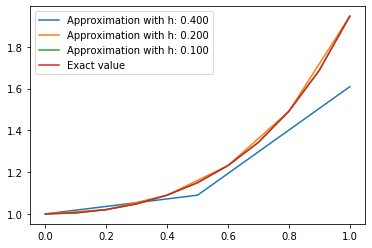

In [11]:
for h in (0.4, 0.2, 0.1):
    t, w = RK4(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with h: %.3f" % h)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact value")
plt.legend()

plt.show()

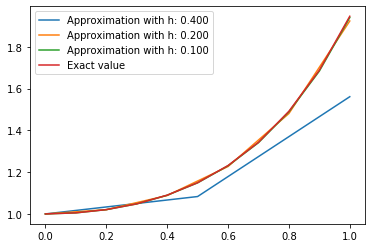

In [12]:
for h in (0.4, 0.2, 0.1):
    t, w = Midpoint_method(f, a, b, h, y_0)
    plt.plot(t, w[0], label="Approximation with h: %.3f" % h)

true_value = exact_sol(t)
plt.plot(t, true_value, label="Exact value")
plt.legend()

plt.show()

In [13]:
for i in range(4):
    h = 0.1/10**i
    t, w = Midpoint_method(f, a, b, h, y_0)
    true_value = exact_sol(t)
    error = abs(true_value - w[0])
    print("h: ",h, "error at 1: ",error[-1])

h:  0.1 error at 1:  0.006143414838916339
h:  0.01 error at 1:  6.573389918895778e-05
h:  0.001 error at 1:  6.616958525551553e-07
h:  0.0001 error at 1:  6.621325709943449e-09


In [14]:
for i in range(4):
    h = 0.1/10**i
    t, w = RK4(f, a, b, h, y_0)
    true_value = exact_sol(t)
    error = abs(true_value - w[0])
    print("h: ",h, "error at 1: ",error[-1])

h:  0.1 error at 1:  1.465465532035637e-06
h:  0.01 error at 1:  1.4247558688396111e-10
h:  0.001 error at 1:  1.7763568394002505e-14
h:  0.0001 error at 1:  4.6629367034256575e-15


# 例2

In [25]:
a, b = 0, 20
h = 0.001

delta = 10**(-3)
init_cond1 = (5, 5, 5)
init_cond2 = (5+delta, 5, 5)

def Lorenz(t, xyz):
    x, y, z = xyz
    s = 10
    r = 28
    b = 8/3
    
    x1 = -s*x + s*y
    x2 = -x*z + r*x - y
    x3 = x*y - b*z
    
    return np.array([x1, x2, x3])

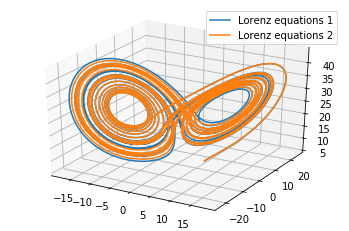

In [26]:
t, w1 = RK4(Lorenz, a, b, h, init_cond1)
t, w2 = RK4(Lorenz, a, b, h, init_cond2)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(w1[0], w1[1, :],w1[2, :],label="Lorenz equations 1")
ax.plot(w2[0, :], w2[1, :],w2[2, :],label="Lorenz equations 2")

plt.legend()
plt.show()

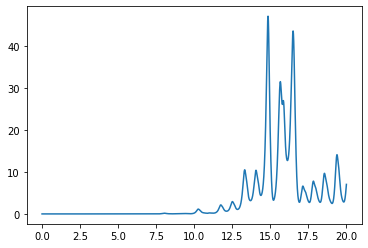

In [27]:
d=np.sqrt((w1[0, :]-w2[0, :])**2+(w1[1, :]-w2[1,:])**2+(w1[2, :]-w2[2,:])**2)
plt.plot(t,d)